In [211]:
from IPython.display import display
import pandas as pd
import requests
import os

# Предварительно загружаем _iris.csv_ файл c <https://www.inaturalist.org>

In [212]:
data = pd.read_csv('iris.csv', index_col=False)
print(data.shape)
display(data)

(119297, 3)


,id,image_url,scientific_name
0,260,https://inaturalist-open-data.s3.amazonaws.com...,Iris haynei
1,2211,https://inaturalist-open-data.s3.amazonaws.com...,Iris douglasiana
2,2232,https://static.inaturalist.org/photos/2825/med...,Iris douglasiana
3,2233,https://inaturalist-open-data.s3.amazonaws.com...,Iris douglasiana
4,2579,https://inaturalist-open-data.s3.amazonaws.com...,Iris pseudacorus
...,...,...,...
119292,194463072,https://static.inaturalist.org/photos/34182853...,Iris versicolor
119293,194466298,https://static.inaturalist.org/photos/34183306...,Iris foetidissima
119294,194479068,https://inaturalist-open-data.s3.amazonaws.com...,Iris pseudacorus
119295,194480462,https://inaturalist-open-data.s3.amazonaws.com...,Iris missouriensis


# Возьмём те типы ирисов у которых доступно от 200 до 250 изображений. 
P.s. Я программирую на ноутбуке без дискретной видеокарты.

In [213]:
size = data.groupby('scientific_name').size()
good_classes = []
for i, s in enumerate(size): 
    if 200 < s < 250:
        good_classes.append(size.keys()[i])
print(f"{len(good_classes)} classes will be explored: {good_classes}")

7 classes will be explored: ['Iris ensata', 'Iris giganticaerulea', 'Iris palaestina', 'Iris reticulata', 'Iris rossii', 'Iris tridentata', 'Iris variegata']


In [214]:
new_data = data[data['scientific_name'].isin(good_classes)]
print(new_data.shape)
display(new_data)

(1594, 3)


,id,image_url,scientific_name
255,307676,https://inaturalist-open-data.s3.amazonaws.com...,Iris tridentata
402,613039,https://inaturalist-open-data.s3.amazonaws.com...,Iris giganticaerulea
405,618873,https://inaturalist-open-data.s3.amazonaws.com...,Iris giganticaerulea
412,622803,https://inaturalist-open-data.s3.amazonaws.com...,Iris giganticaerulea
426,633861,https://inaturalist-open-data.s3.amazonaws.com...,Iris giganticaerulea
...,...,...,...
118779,192705893,https://inaturalist-open-data.s3.amazonaws.com...,Iris ensata
119043,193587475,https://inaturalist-open-data.s3.amazonaws.com...,Iris ensata
119171,194113592,https://inaturalist-open-data.s3.amazonaws.com...,Iris palaestina
119203,194203419,https://inaturalist-open-data.s3.amazonaws.com...,Iris variegata


# Создадим папки с для разных scientific_name

In [215]:
def create_directory(directory_path, mother_dir):
    if not os.path.exists(f'{mother_dir}/{directory_path}'):
        os.makedirs(f'{mother_dir}/{directory_path}')
    else:
        pass

image_dir = 'data'
for d in good_classes:
    create_directory(d, image_dir)

# Сохраним изображения в соответствущие папки scientific_name

In [216]:
for index, row in new_data.iterrows():
    image_url = row['image_url']
    scientific_name = row['scientific_name']

    image_path = f'{image_dir}/{scientific_name}/image_{index}.jpg'

    if not os.path.exists(image_path):
        response = requests.get(image_url)
        with open(image_path, 'wb') as f:
            f.write(response.content)
    else:
        """ Условие добавлено, чтобы если произойдёт прерывание программы вам не пришлось заново скачивать изображения с интернета. """
        pass

# Посмотрим какие виды мы исследуем

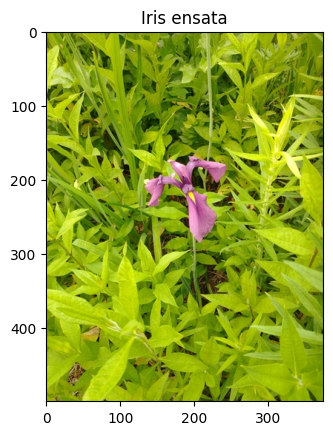

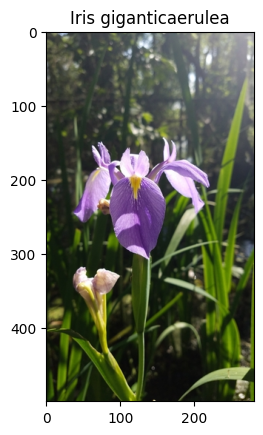

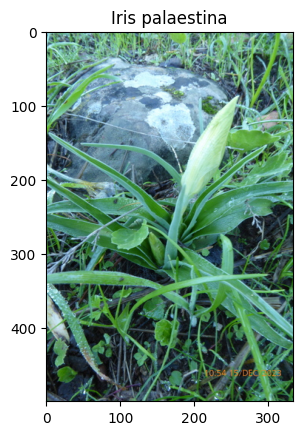

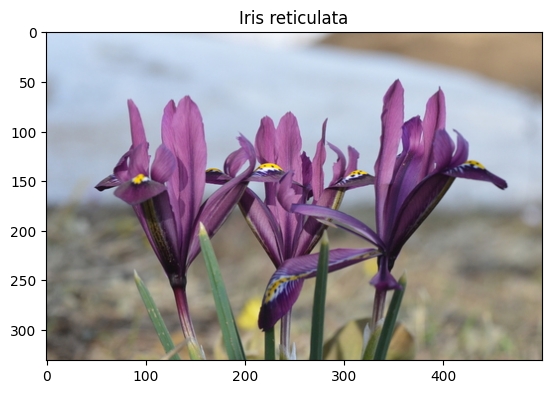

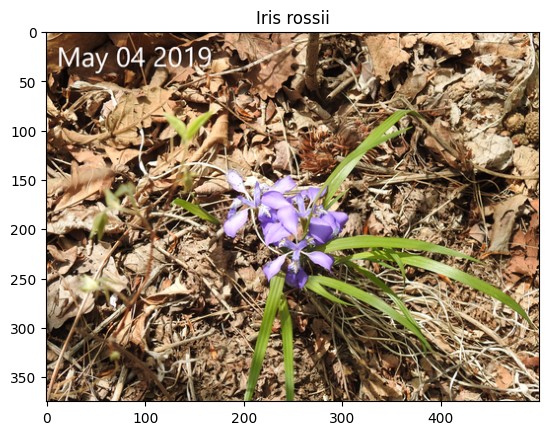

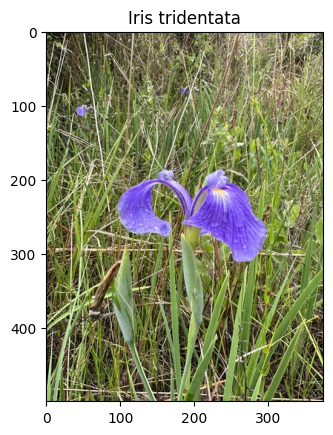

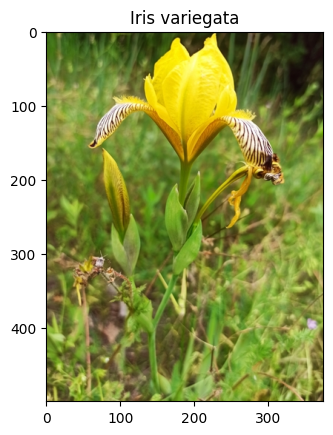

In [217]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

sub_folders = [f.path for f in os.scandir(image_dir) if f.is_dir()]
iris_index = 10

for sub_folder in sub_folders:
    image_files = [f.path for f in os.scandir(sub_folder) if f.is_file() and f.name.endswith(('.png', '.jpg', '.jpeg'))]
    first_image_path = image_files[iris_index]
    image = imread(first_image_path)

    plt.imshow(image)
    plt.title(os.path.basename(sub_folder))
    plt.show()